# Исследование объявлений о продаже квартир

Анализ признаков влияющих на стоимость квартир в регионе

Описание данных

    airports_nearest — расстояние до ближайшего аэропорта (м)
    balcony — количество балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра (м)
    days_exposition — сколько дней было размещено объявление
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей
    is_apartment — апартаменты
    kitchen_area — площадь кухни (м²)
    last_price — последняя цена
    living_area — жилая площадь (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка
    parks_around3000 — парки на расстоянии в 3 км
    parks_nearest — расстояние до парка (м)
    ponds_around3000 — водоемы на расстоянии 3 км
    ponds_nearest — расстояние до водоёма (м)
    rooms — количество комнат
    studio — студия
    total_area — площадь квартиры (м²)
    total_images — число фотографий объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
housing = pd.read_csv('real_estate_data.csv', sep='\t',decimal='.')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format ='{:.2f}'.format

In [50]:
print('_____________________________________')
na = 0
for column in housing.columns:
    na = housing[column].isna().sum()
    if na > 0:
        print('В столбце', column, 'найдено', na, 'пропуска.')

#Функция определения числового значения
def isdigit(str):
    try:
        float(str)
        return True
    except TypeError:
        return False
    except ValueError:
        return False
    
#Проверим данные на нулевые значения   
print('_____________________________________')
zero = 0
for column in housing.columns:
    zero = housing[housing[column] == 0][column].count()
    if isdigit(zero) and zero > 0:
        print('В столбце', column, 'имеется', zero, 'нулевых значений.')

#Проверка на отрицательные значения
value = 0
print('_____________________________________')
for column in housing.columns:
    value_1 = housing.loc[1, column]
    if isdigit(value_1):
        value = housing[housing[column] < 0][column].count()
        if isdigit(value) and value > 0:
            print('В столбце', column, 'имеется', value, 'отрицательных значений.') 


_____________________________________
В столбце ceiling_height найдено 9195 пропуска.
В столбце floors_total найдено 86 пропуска.
В столбце living_area найдено 1903 пропуска.
В столбце is_apartment найдено 20924 пропуска.
В столбце kitchen_area найдено 2278 пропуска.
В столбце balcony найдено 11519 пропуска.
В столбце locality_name найдено 49 пропуска.
В столбце airports_nearest найдено 5542 пропуска.
В столбце cityCenters_nearest найдено 5519 пропуска.
В столбце parks_around3000 найдено 5518 пропуска.
В столбце parks_nearest найдено 15620 пропуска.
В столбце ponds_around3000 найдено 5518 пропуска.
В столбце ponds_nearest найдено 14589 пропуска.
В столбце days_exposition найдено 3181 пропуска.
_____________________________________
В столбце total_images имеется 1059 нулевых значений.
В столбце rooms имеется 197 нулевых значений.
В столбце is_apartment имеется 2725 нулевых значений.
В столбце studio имеется 23550 нулевых значений.
В столбце open_plan имеется 23632 нулевых значений.
В ст

### Вывод

В датафрейме 23699 значений. Пропуски имеются в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
    

### Шаг 2. Предобработка данных

In [51]:
#Для заполния пропуски в столбце 'floors_total',посчитаем количество домов разной этажности в датасете
floors_group = housing['floors_total'].value_counts()
floors_group

5.00     5788
9.00     3761
16.00    1376
12.00    1362
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     833
3.00      668
7.00      592
14.00     553
18.00     505
24.00     469
8.00      390
2.00      383
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
29.00       1
60.00       1
33.00       1
52.00       1
37.00       1
34.00       1
Name: floors_total, dtype: int64

In [52]:
def floors_total_prob(row):
    """
    Функция определяющая вероятностное занчения этажности здания по значениям имеющимся
    в датасете. Необходима для заполнения пропусков в столбце 'floors_total'. 
    Функция считает вероятность из значений 'floors_group' с индексами большими либо равными значению 'floor', 
    как количество значений 'floors_group' деленное на суммарное количество.
    Вероятное значение максимального этажа определяется функцией np.random.choice() по полученным значениям
    вероятности в floors_probe
    """
    floor = row['floor']
    floors_prob = floors_group[floors_group.index >= floor] / floors_group[floors_group.index >= floor].sum()
    return np.random.choice(floors_prob.index, p=floors_prob.values)

housing['floors_total_prob'] = housing.apply(floors_total_prob, axis=1)    

Оценим распределение этажности до и после заполнения пропусков

In [53]:
# Вспомогательный датасет
fl_prob = housing.loc[:, ['floors_total','floors_total_prob', 'floor']]

In [54]:
fl_prob.describe()

,floors_total,floors_total_prob,floor
count,23613.00,23699.00,23699.00
mean,10.67,13.22,5.89
std,6.60,7.07,4.89
min,1.00,1.00,1.00
25%,5.00,7.00,2.00
50%,9.00,12.00,4.00
75%,16.00,18.00,8.00
max,60.00,60.00,33.00


Полученные вероятностные значения несколько отличаются от исходных, на при заполнении 86 пропусков в столбце floor_total не сильно повлияют на общий результат и не внесут пиков на графиках средних значений и медиан

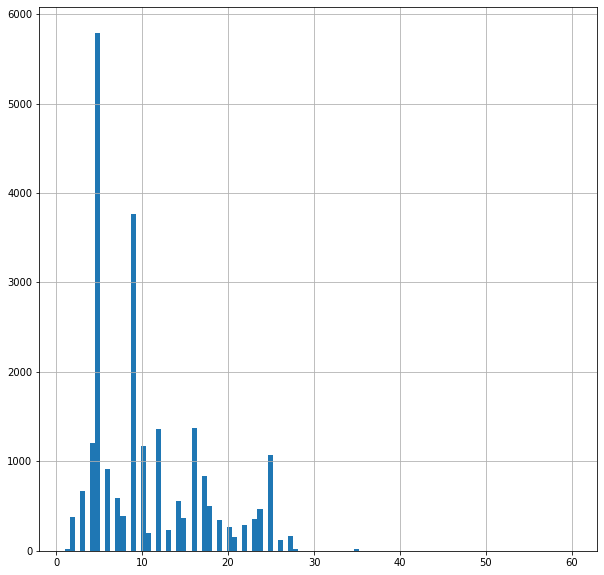

In [55]:
fl_prob['floors_total'].hist(
    bins = 100,
    figsize=(10, 10))

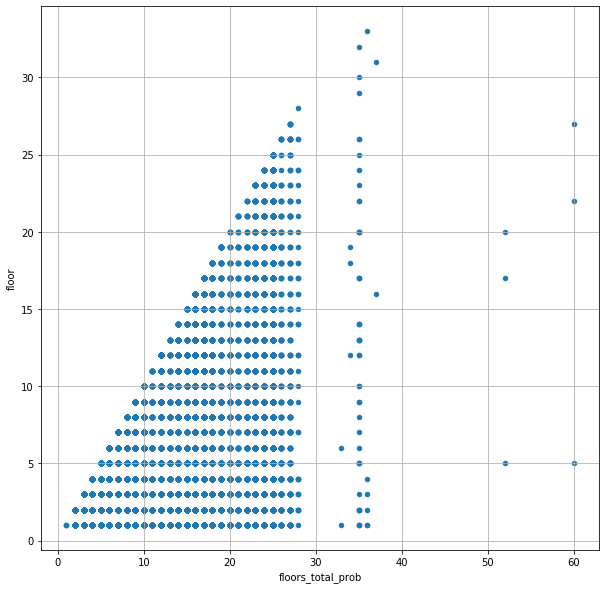

In [56]:
fl_prob.plot(
    x='floors_total_prob', 
    y='floor', 
    kind='scatter', 
    figsize=(10,10), 
    grid = True)


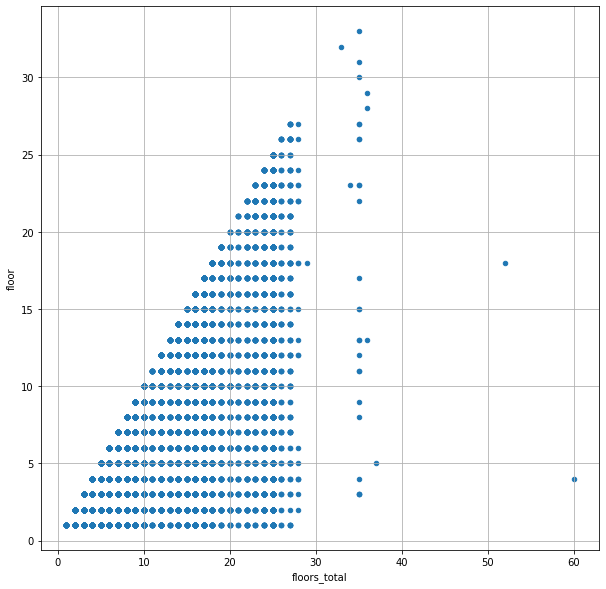

In [57]:
fl_prob.plot(
    x='floors_total', 
    y='floor', 
    kind='scatter', 
    figsize=(10,10), 
    grid = True)

В целом, респределения очень похожи. 

In [58]:
housing['floors_total'].isna().sum()

86

In [59]:
housing['floors_total'].fillna(
    value=housing['floors_total_prob'], 
    inplace = True)

In [60]:
housing['floors_total'].isna().sum()

0

,floors_total,floors_total_prob,floor
count,23699.00,23699.00,23699.00
mean,10.70,13.22,5.89
std,6.61,7.07,4.89
min,1.00,1.00,1.00
25%,5.00,7.00,2.00
50%,9.00,12.00,4.00
75%,16.00,18.00,8.00
max,60.00,60.00,33.00


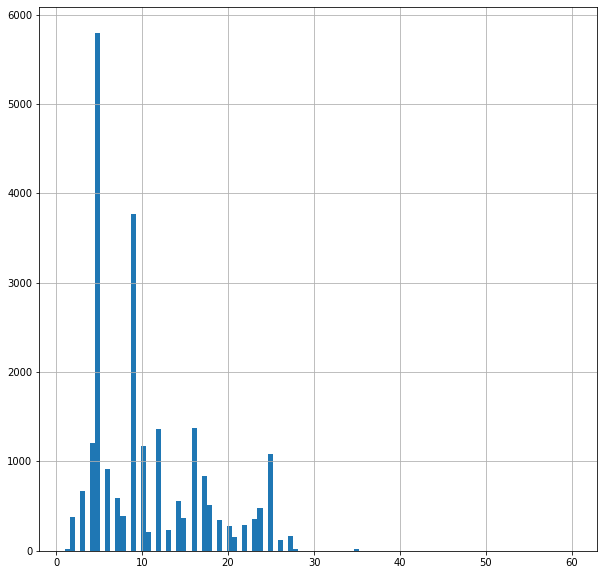

In [61]:
fl_prob = housing.loc[:, ['floors_total', 'floors_total_prob', 'floor']]
fl_prob['floors_total'].hist(
    bins = 100,
    figsize=(10, 10))

fl_prob.describe()

In [62]:
#Удалим вспомогательный столбец 'floors_total_prob'
del housing['floors_total_prob']

Заполнение пропусков не повлияло на общее распределение значений.

# Заполним пустые значения высоты потолков

Для заполнения пустых ceiling_height будем исходить из предположения что высота потолков в группах по этажности зданий будет схожей. Будем заполнять медианой.

In [63]:
#Вспомогательный элемент со значениями медианы по группам этажности. 
ceiling_hight_median_by_floors = housing.groupby('floors_total')['ceiling_height'].median()

ceiling_hight_median_by_floors.fillna(housing['ceiling_height'].median(), inplace=True)

In [64]:
def hight_from_floors(row):
    """
    Функция принимает этажность здания и возвращает значение медианы высоты потолка
    """
    floors = row['floors_total']
    return ceiling_hight_median_by_floors[floors]    

In [65]:
#Заполним пропуски высоты потолков
housing['ceiling_height_median'] = housing.apply(hight_from_floors, axis=1)
housing['ceiling_height'].fillna(housing['ceiling_height_median'],inplace=True)
#Удалим вспомогательный столбец
del housing['ceiling_height_median']

# Заполним пустоты в балконах

Пустоты в количестве балконов заполним исходя из предположения что при размещении объявления, те у кого балкона нет, этот параметр не заполняли.

In [66]:
housing['balcony'].fillna(0, inplace=True)

# Заполним значения жилой площади и площади кухни

Значения жилой площади и площади кухни определим через общую площадь квартиры. 
В датасете есть несколько групп квартир: 
- обычные
- студии
- аппартаменты
- квартиры с открытой планировкой.
Для каждой из этих групп посчитаем среднюю долю жилой площади в площади квартиры. После чего используем это значениедля заполнения пустых значений.

In [67]:
#Начнем со студий.
studios = housing.query('studio')
studios['area_percent'] = studios['living_area'] / studios['total_area']
studios['area_percent'].describe()

C:\Users\bvfrc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count   139.00
mean      0.68
std       0.11
min       0.09
25%       0.62
50%       0.69
75%       0.74
max       0.96
Name: area_percent, dtype: float64

In [68]:
studios['living_area'].fillna(studios['total_area'] * studios['area_percent'].median(), inplace = True)
housing.fillna(studios, inplace = True)

C:\Users\bvfrc\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [69]:
#Далее - аппартаменты. Перед этим пропуски в столбце заполним значением False, 
#исходя из того что при размещении объявление это поле не заполняли
housing['is_apartment'].fillna(False, inplace = True)
apartment = housing.query('is_apartment')
apartment['area_percent'] = apartment['living_area'] /apartment['total_area']
apartment['area_percent'].describe()

C:\Users\bvfrc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


count   42.00
mean     0.57
std      0.14
min      0.33
25%      0.48
50%      0.56
75%      0.67
max      0.97
Name: area_percent, dtype: float64

In [70]:
apart_median = apartment['area_percent'].median()
apartment['living_area'].fillna(apartment['total_area'] * apart_median, inplace =True)
housing.fillna(apartment, inplace = True)

In [71]:
#Открытая планирова
openplan = housing.query('open_plan')
openplan['area_percent'] = openplan['living_area'] / openplan['total_area']
openplan['area_percent'].describe()

C:\Users\bvfrc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count   62.00
mean     0.69
std      0.12
min      0.39
25%      0.64
50%      0.68
75%      0.74
max      1.00
Name: area_percent, dtype: float64

In [72]:
openplan_median = openplan['area_percent'].median()
openplan['living_area'].fillna(openplan['total_area'] * openplan_median, inplace =True)
housing.fillna(openplan, inplace = True)

In [73]:
#С оставшимися квартирами поступим тем же образом
#По тому же принцыпу заполним пропуски в площадях кухонь
other_flats = housing.query('studio == False and open_plan == False and is_apartment == False')
other_flats['area_percent'] = other_flats['living_area'] / other_flats['total_area']
other_flats['area_percent'].describe()

C:\Users\bvfrc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


count   21553.00
mean        0.56
std         0.10
min         0.02
25%         0.49
50%         0.57
75%         0.64
max         0.98
Name: area_percent, dtype: float64

In [74]:
#Кухни
other_flats['kitchen_area_percent'] = other_flats['kitchen_area'] / other_flats['total_area']
other_flats['kitchen_area_percent'].describe()

C:\Users\bvfrc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count   21386.00
mean        0.19
std         0.07
min         0.03
25%         0.13
50%         0.17
75%         0.23
max         0.79
Name: kitchen_area_percent, dtype: float64

In [75]:
other_flats_kitchen_median = other_flats['kitchen_area_percent'].median()
other_flats['kitchen_area'].fillna(other_flats['total_area'] * other_flats_kitchen_median, inplace =True)

In [76]:
other_flats_median = other_flats['area_percent'].median()
other_flats['living_area'].fillna(other_flats['total_area'] * other_flats_median, inplace =True)
housing.fillna(other_flats, inplace = True)

In [77]:
housing.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              231
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Оставшиеся незаполненными значения площади кухонь относятся к студиям и открытым планировкам, где нельзя разделить жилую площадь и площадь хукни

Также при анализе было обнаружено что нулевые занчения в количестве комнат связаны с тем, является ли квартира студией или квартирой с открытой планировкой. Видимо связано с тем что кухня и комната объединены в одну площадь.

In [78]:
housing.query('rooms == 0  and (studio or open_plan)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.00,27.00,2017-03-30T00:00:00,0,2.75,24.00,15.50,2,False,...,nan,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,181.00
349,4,2320000.00,25.00,2017-09-27T00:00:00,0,2.60,14.00,17.00,1,False,...,nan,0.00,деревня Кудрово,nan,nan,nan,nan,nan,nan,45.00
440,8,2480000.00,27.11,2018-03-12T00:00:00,0,2.70,17.00,24.75,4,False,...,nan,2.00,Санкт-Петербург,38171.00,15015.00,0.00,nan,2.00,982.00,64.00
508,0,3375000.00,34.40,2017-03-28T00:00:00,0,2.65,26.00,24.30,19,False,...,nan,1.00,посёлок Парголово,53115.00,19292.00,0.00,nan,1.00,593.00,430.00
608,2,1850000.00,25.00,2019-02-20T00:00:00,0,2.60,10.00,17.24,7,False,...,nan,0.00,посёлок Шушары,nan,nan,nan,nan,nan,nan,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.00,26.00,2017-09-01T00:00:00,0,2.75,25.00,18.00,16,False,...,nan,0.00,Санкт-Петербург,11405.00,13222.00,0.00,nan,1.00,623.00,14.00
23442,0,2500000.00,27.70,2017-09-28T00:00:00,0,2.75,24.00,18.00,4,False,...,nan,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,4.00
23554,15,3350000.00,26.00,2018-09-07T00:00:00,0,2.75,19.00,17.92,8,False,...,nan,0.00,Санкт-Петербург,18090.00,17092.00,0.00,nan,2.00,112.00,31.00
23592,10,1450000.00,29.00,2017-11-11T00:00:00,0,2.55,9.00,18.00,8,False,...,nan,2.00,Никольское,nan,nan,nan,nan,nan,nan,82.00


# Разберемся с населенными пунктами

Обзор значений locality_name показал что название населенного пункта может состоять из типа пункта и непосредственно названия. Выделим переменную locality_short_name в которой будет только название.

In [79]:
names = housing['locality_name'].unique()
names

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [80]:
def local_name_only(row):
    """
    Функция на вход получает строку с названием, побуквенно её проверяет, и если находит
    прописную букву, начинает записывать короткое название в новую переменную, которую и возвращает.
    """
    names = row['locality_name']
    flag = False
    short_name = ('')
    for liter in list(names):
        if liter.isupper() or flag:
            flag = True
            short_name += liter
    return short_name
            

In [81]:
housing['locality_short_name'] = housing.dropna(subset = ['locality_name']).apply(local_name_only, axis =1)

# Уточним названия насленных пунктов 

Попробуем восстановить названия населенных пунктов по расстояниям до аэропорта и центра города.

In [93]:
housing.query("locality_name == 0")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name


In [85]:
#Вспомогательный датасет
house_1 = housing[housing["locality_name"].isna()]
house_1['locality_short_name'].isna().sum()

49

In [95]:
house_1.index


Int64Index([ 1097,  2033,  2603,  2632,  3574,  4151,  4189,  4670,  5343,
             5707,  6765,  7114,  7330,  7600,  8568,  8986,  9821, 10122,
            11248, 12879, 12936, 13223, 13690, 14273, 14342, 15686, 15866,
            16499, 16561, 16610, 17535, 17764, 18526, 18917, 19045, 19972,
            20057, 20382, 20590, 20654, 21119, 21276, 21333, 21715, 21898,
            22474, 22717, 22933, 23214],
           dtype='int64')

In [117]:
a = housing.loc[1097,'airports_nearest']

In [118]:
a

23478.0

In [103]:
housing[(
    housing['airports_nearest']==23478) & (
    housing['cityCenters_nearest']==4258) & (
    housing['locality_short_name'].notna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name


In [122]:
for ind in house_1.index:
    """
    Циклом пройдем по индексам отсутствующих элементов. Если в исходной таблице имеются значения удовлетворяющие
    условию ниже, заполняем первым значением группы.
    Условие заполнения пропусков в следующем порядке:
    1. значения расстояний до аэропорта и центра города во вспомогательной и исходной таблице равны
    2. значение расстояния до аэропорта во вспомогательной и исходной таблице равны
    3. значение расстояния до центра города во вспомогательной и исходнйо таблице равны.
    4. значения для которых не найдены аналогичные комбинации расстояния до аэропорта и центра города, а
       значения расстояний не пустое - заполняется значением "Санкт-Петербург" (Возможно эти значения
       стоило удалить?)
    """
    a_1 = house_1.loc[ind,'airports_nearest']
    a_2 = house_1.loc[ind,'cityCenters_nearest']
    
    location_list_1 = housing[(
        housing['airports_nearest']==a_1) & (
        housing['cityCenters_nearest'] == a_2) & (
        housing['locality_short_name'].notna())]['locality_short_name'].values
    
    location_list_2 = housing[(
        housing['airports_nearest']==a_1) & (
        housing['locality_short_name'].notna())]['locality_short_name'].values
    
    location_list_3 = housing[(
        housing['cityCenters_nearest']==a_2) & (
        housing['locality_short_name'].notna())]['locality_short_name'].values
   
    if len(location_list_1) != 0:
        house_1.loc[ind, 'locality_short_name'] = location_list_1[0]
    elif len(location_list_2) !=0:
        house_1.loc[ind, 'locality_short_name'] = location_list_2[0]
    elif len(location_list_3) !=0:
        house_1.loc[ind, 'locality_short_name'] = location_list_3[0]
    elif not np.isnan(a_1):
        house_1.loc[ind, 'locality_short_name'] = "Санкт-Петербург"

C:\Users\bvfrc\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [123]:
house_1['locality_short_name'].isna().sum()

8

In [124]:
#Заменим пропущенные значения исходной таблицы значениями вспомогательной.
housing.fillna(house_1, inplace = True)

In [127]:
housing[housing['locality_short_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name
2033,6,5398000.00,80.00,2017-05-30T00:00:00,3,3.00,4.00,42.60,2,False,...,0.00,NaN,nan,nan,nan,nan,nan,nan,34.00,NaN
14342,3,3611000.00,53.50,2017-04-27T00:00:00,1,3.00,4.00,25.80,3,False,...,1.00,NaN,nan,nan,nan,nan,nan,nan,92.00,NaN
17535,2,5985000.00,79.80,2018-07-30T00:00:00,3,2.55,9.00,45.22,2,False,...,0.00,NaN,nan,nan,nan,nan,nan,nan,213.00,NaN
20382,8,1750000.00,72.90,2018-10-27T00:00:00,3,2.55,5.00,47.30,2,False,...,0.00,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
20590,7,3380000.00,56.00,2017-11-06T00:00:00,2,2.70,4.00,29.00,3,False,...,1.00,NaN,nan,nan,nan,nan,nan,nan,78.00,NaN
21715,2,6047550.00,80.10,2018-07-30T00:00:00,2,2.55,9.00,30.50,2,False,...,0.00,NaN,nan,nan,nan,nan,nan,nan,176.00,NaN
21898,2,5886750.00,83.50,2018-07-30T00:00:00,2,2.55,9.00,36.60,2,False,...,0.00,NaN,nan,nan,nan,nan,nan,nan,169.00,NaN
22717,9,3000000.00,35.00,2018-01-02T00:00:00,1,2.60,16.00,16.00,7,False,...,1.00,NaN,nan,nan,nan,nan,nan,nan,75.00,NaN


In [128]:
#Уберем оставшиеся 8 значений из датасета.
housing.dropna(subset = ['locality_short_name'], inplace = True)

In [129]:
housing['locality_name'] = housing['locality_short_name']

In [130]:
#Избавимся от вспомогательной строки
del housing['locality_short_name']

# Заполним пропуски в расстоянии до аэропорта и центра города


Значения расстояний до аэропорта и центра города заполним медианными значениями датасета, сгруппированного по названию населенных пунктов

In [131]:
#Вспомогательный датасет - медианы значений расстояний до аэропорта по населенным пунктам
airports_group = housing.groupby('locality_name')['airports_nearest'].describe().loc[:,'50%']

In [132]:
def airports_by_median(row):
    """
    Присваивает значению строки значение медианы расстояния до аэропорта по имени наслененного пункта
    """
    name = row['locality_name']
    return airports_group[name]

In [133]:
housing['airports_nearest_median'] = housing.apply(airports_by_median, axis =1)

In [134]:
#Вспомогательный датасет - медианы значений расстояний до центра города по населенным пунктам
cityCenters_group = housing.groupby('locality_name')['cityCenters_nearest'].describe().loc[:,'50%']

In [135]:
def city_by_median(row):
    """
    Присваивает значению строки значение медианы расстояния до центра города по имени наслененного пункта
    """
    name = row['locality_name']
    return cityCenters_group[name]

In [136]:
housing['cityCenters_nearest_median'] = housing.apply(airports_by_median, axis =1)

In [137]:
housing['airports_nearest'].fillna(housing['airports_nearest_median'], inplace=True)
housing['cityCenters_nearest'].fillna(housing['cityCenters_nearest_median'], inplace=True)
del housing['cityCenters_nearest_median']
del housing['airports_nearest_median']

In [138]:
housing.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              231
balcony                     0
locality_name               0
airports_nearest         4829
cityCenters_nearest      4829
parks_around3000         5510
parks_nearest           15612
ponds_around3000         5510
ponds_nearest           14581
days_exposition          3180
dtype: int64

В датасете осталось 4829 незаполненных значений расстояния до аэропорта и центра города. В них предсталенны населенные пункты для которых полностью отсутствует информация о расстоянии до аэропорта или центра города. Пустых значений слишком много для исключения, поэтому оставим их пустыми.

# Заполним NaN в строках парки и пруды

Отсутствующие значения в количестве парков и прудов в радиусе 3000 заполняем нулями, считая что "ноль" 
не стали вводить. 
Также проверим нет ли случаев когда парки или пруды в радиусе 3000 есть,
а значение ближайшего парка или пруда - пустое

In [144]:
housing[(
    housing['parks_around3000'] > 0) & (
    housing['parks_nearest'].isna())]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [145]:
housing['parks_around3000'].fillna(0, inplace = True)

In [146]:
housing[(
    housing['ponds_around3000'] > 0) & (
    housing['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [147]:
housing['ponds_around3000'].fillna(0, inplace = True)

Пустые значения parks_nearest и ponds_nearest говорит о том что рядом нет парков и значения parks_around3000 и ponds_around3000 у них равны нулю. 

In [148]:
housing.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              231
balcony                     0
locality_name               0
airports_nearest         4829
cityCenters_nearest      4829
parks_around3000            0
parks_nearest           15612
ponds_around3000            0
ponds_nearest           14581
days_exposition          3180
dtype: int64

# Разберемся со днями

Приведем значения first_day_exposition к формату datetime.

In [149]:
housing['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [150]:
housing['first_day_exposition'] = pd.to_datetime(housing['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [151]:
def last_day(row):
    """
    Функция суммирует даты появления объявления о продажи и длительности опубликования.
    Получим дату снятия объявления.
    """
    start_day = row['first_day_exposition']
    days_delta = row['days_exposition']
    return start_day + pd.Timedelta(days=days_delta)

In [152]:
housing['last_day_exposition'] = housing.dropna(subset = ['days_exposition']).apply(last_day, axis=1)
housing['last_day_exposition'].max()

Timestamp('2019-05-02 00:00:00')

In [153]:
pd.DatetimeIndex(housing['first_day_exposition']).max()

Timestamp('2019-05-03 00:00:00')

Определили что базу данных передели на анализ после 02.05.2019

# Заменим типы данных

In [154]:
#Заменим типы данных int64 и float64 на более подходящие по размерности
for name, values in housing.iteritems():
        print('{name}'.format(name=name))
        print('Максимум -', housing[name].max(), ', минимум - ', housing[name].min())
housing['total_images'] = housing['total_images'].astype('int8')
housing['total_area'] = housing['total_area'].round(1).astype('float32')
housing['rooms'] = housing['rooms'].astype('int8')
housing['ceiling_height'] = housing['ceiling_height'].astype('float16')
housing['floors_total'] = housing['floors_total'].astype('int8')
housing['living_area'] = housing['living_area'].round(1).astype('float16')
housing['floor'] = housing['floor'].astype('int8')
housing['last_price'] = housing['last_price'].astype('int32')
housing['kitchen_area'] = housing['kitchen_area'].round(1).astype('float16')
housing['balcony'] = housing['balcony'].astype('int8')
housing['airports_nearest'] = housing['airports_nearest'].round(0).astype('float32')
housing['cityCenters_nearest'] = housing['cityCenters_nearest'].round(0).astype('float32')
housing['parks_around3000'] = housing['parks_around3000'].astype('int8')
housing['ponds_around3000'] = housing['ponds_around3000'].astype('int8')
housing['ponds_nrearest'] = housing['ponds_nearest'].round(0).astype('float32')
housing['parks_nrearest'] = housing['parks_nearest'].round(0).astype('float32')
housing['days_exposition'] = housing['days_exposition'].round(0).astype('float32')

total_images
Максимум - 50 , минимум -  0
last_price
Максимум - 763000000.0 , минимум -  12190.0
total_area
Максимум - 900.0 , минимум -  12.0
first_day_exposition
Максимум - 2019-05-03 00:00:00 , минимум -  2014-11-27 00:00:00
rooms
Максимум - 19 , минимум -  0
ceiling_height
Максимум - 100.0 , минимум -  1.0
floors_total
Максимум - 60.0 , минимум -  1.0
living_area
Максимум - 409.7 , минимум -  2.0
floor
Максимум - 33 , минимум -  1
is_apartment
Максимум - True , минимум -  False
studio
Максимум - True , минимум -  False
open_plan
Максимум - True , минимум -  False
kitchen_area
Максимум - 112.0 , минимум -  1.3
balcony
Максимум - 5.0 , минимум -  0.0
locality_name
Максимум - Янино-1 , минимум -  Агалатово
airports_nearest
Максимум - 84869.0 , минимум -  0.0
cityCenters_nearest
Максимум - 67850.0 , минимум -  181.0
parks_around3000
Максимум - 3.0 , минимум -  0.0
parks_nearest
Максимум - 3190.0 , минимум -  1.0
ponds_around3000
Максимум - 3.0 , минимум -  0.0
ponds_nearest
Максимум - 

In [155]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23691 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23691 non-null int8
last_price              23691 non-null int32
total_area              23691 non-null float32
first_day_exposition    23691 non-null datetime64[ns]
rooms                   23691 non-null int8
ceiling_height          23691 non-null float16
floors_total            23691 non-null int8
living_area             23691 non-null float16
floor                   23691 non-null int8
is_apartment            23691 non-null bool
studio                  23691 non-null bool
open_plan               23691 non-null bool
kitchen_area            23460 non-null float16
balcony                 23691 non-null int8
locality_name           23691 non-null object
airports_nearest        18862 non-null float32
cityCenters_nearest     18862 non-null float32
parks_around3000        23691 non-null int8
parks_nearest           8079 non-null float64
ponds_around3000      

Для каждой строки, исходя из максимума и минимума значения каждого столбца, был выбран тип данных.

In [156]:
housing.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              231
balcony                     0
locality_name               0
airports_nearest         4829
cityCenters_nearest      4829
parks_around3000            0
parks_nearest           15612
ponds_around3000            0
ponds_nearest           14581
days_exposition          3180
last_day_exposition      3180
ponds_nrearest          14581
parks_nrearest          15612
dtype: int64

_____________________________________
    В столбце ceiling_height найдено 9195 пропуска.
    В столбце floors_total найдено 86 пропуска.
    В столбце living_area найдено 1903 пропуска.
    В столбце is_apartment найдено 20924 пропуска.
    В столбце kitchen_area найдено 2278 пропуска.
    В столбце balcony найдено 11519 пропуска.
    В столбце locality_name найдено 49 пропуска.
    В столбце airports_nearest найдено 5542 пропуска.
    В столбце cityCenters_nearest найдено 5519 пропуска.
    В столбце parks_around3000 найдено 5518 пропуска.
    В столбце parks_nearest найдено 15620 пропуска.
    В столбце ponds_around3000 найдено 5518 пропуска.
    В столбце ponds_nearest найдено 14589 пропуска.
    В столбце days_exposition найдено 3181 пропуска.
_____________________________________
    В столбце total_images имеется 1059 нулевых значений.
    В столбце rooms имеется 197 нулевых значений.
    В столбце is_apartment имеется 2725 нулевых значений.
    В столбце studio имеется 23550 нулевых значений.
    В столбце open_plan имеется 23632 нулевых значений.
    В столбце balcony имеется 3758 нулевых значений.
    В столбце airports_nearest имеется 1 нулевых значений.
    В столбце parks_around3000 имеется 10106 нулевых значений.
    В столбце ponds_around3000 имеется 9071 нулевых значений.
_____________________________________

# Выводы 
1. Были устранены пропуски в данных ceiling_height по значениям этажности зданий. Пропуски могли возникнуть в результате невнимательности ввода данных или потому что это был не обязательный для заполнения параметр.

2. Были устранены пропуски в значениях столбца floors_total случайными значениями согласно распределению имеющихся значений. Пропуски могли возникнуть потому что пользователь не заполнил эти данные в форме.

3. Были устранены пропуски в значениях столбца living_area и kitchen_area по значениям полной площади квартиры. Оставшиеся пустыми значения kitchen_area это значения в квартирах-студиях и квартирах с открытой планировкой. Пропуски могли возникнуть потому что пользователь не заполнил эти данные в форме.

4. Пропуски в значениях is_apartment заполнены нулями, предполагаем что владельцы квартир, не являющихся аппартаментами просто не заполняли это поле.

5. Пропуски в значениях balcony предположительно пусты в тех объявлениях где балонов нет. Значение было заполнено нулями. 

6. Пропуски в locality_name заполнены исходя из значений расстояний до центра города и аэропорта. Возможно пропуски возникли при переносе базы данных.

7. Пропуски в значениях airports_nearest и cityCenters_nearest выбраны исходя из средних значений расстояний в соотвествующих насленнных пунктах. Пустыми значения остались только для тех населенных пунктов, которые не имели никаких данных о расстоянии до центра города или аэропорта. Так как данные получались автоматизированной системой, стоит направтить сообщение об ошибках в вычислении.

8. Пустые значения в столбцах parks_around3000 и ponds_around3000 заполнены либо исходя из средних значений для населенного пункта либо 0 - ни парков ни прудов в радиусе 3000 нет.

9. Пустые значения ponds_nearest и parks_nearest - в тех местах где в радиусе 3000 нет парков или прудов, оставлены пустыми.

10. Пустые значения days_exposition можно было заполнить например средним или медианой, но это может приветси к пикам на графиках. Значения остались пустыми.

11. Данные приведены к соответствующему типу согласно максимуму и минимуму значений. Значения с пустыми значениями остались 'float'.

12. Значения first_day_exposition приведены к типу datetime.

### Шаг 3. Посчитаем и добавим в таблицу:
    Цену квадратного метра;
    День недели, месяца и года появления объявления
    Группу этажности - первый, последний, другой
    Долю жилой площади и площади кухни в общей площади квартиры

In [157]:
housing['price_per_meter'] = housing['last_price'] / housing['total_area']

In [158]:
housing['day_of_week_exposition'] = pd.DatetimeIndex(housing['first_day_exposition']).dayofweek
housing['month_of_exposition'] = pd.DatetimeIndex(housing['first_day_exposition']).month
housing['year_of_exposition'] = pd.DatetimeIndex(housing['first_day_exposition']).year

In [159]:
def floor_group_define(row):
    """
    Функция распределения этажа квартиры в группы. Первый, последнйи, другой.
    """
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == max_floor:
        return 'last'
    return 'another'    

In [160]:
housing['floor_group'] = housing.apply(floor_group_define, axis=1)

In [161]:
housing['living_area_percent'] = housing['living_area'] / housing['total_area']
housing['kitchen_area_percent'] = housing['kitchen_area'] / housing['total_area']

### Шаг 4. Исследовательский анализ данных:

In [162]:
def hist_plotting(df, param, size =(10,10), b=100, a=1):
    """
    Функция построения графиков датафрейма. За основу взята функция df.hist(). Функция на вход получает 
    имя датафрейма, название анализируемого столбца и параметры для построения графика.
    Функция считает квантили, межквантильный интервал, среднее.
    Функция также считает количество отсеиваемых значений, и если оно больше 1% увеличивает правую
    границу графика на половину межквантильного интервала.
    На выходе получается график распределения, границы значений, количество исключенных значений.
    Функция помогает отсеять выбивающиеся значения.
    """
    Q1 = df[param].quantile(.25)
    Q3 = df[param].quantile(.75)
    Q2 = df[param].quantile(.5)
    IQR = Q3-Q1
    
    param_mean = df[param].mean()
    param_count = df[param].count()
    param_max_del = round(param_count * 0.05) #Желательно не исключать из анализа значений больше 5%
    param_norm_del = round(param_count * 0.01) #А лучше не более 1%
    #Максимум и минимум значений столбца
    param_min = df[param].min()
    param_max = df[param].max()
    #В качестве нижней границы построения используем значения либо первой квантили 
    #минус полтора межквантильных интервала, либо минимальное
    #значение датасета, аналогично для верхней границы.
    x_min = max(Q1 - 1.5 * IQR, param_min)
    x_max = min(Q3 + 1.5 * IQR, param_max)
    #Определяем количество исключенных из графика значений
    count_left = df.loc[df[param]<x_min][param].count()
    count_right = df.loc[df[param]>x_max][param].count()
    #Попробуем уменьшить количество исключенных значений, будем повышать значения верхней 
    #границы на половину межквартильного интервала.
    #Пока количество исключенных значений не будет менее 2%
    while count_right >= param_norm_del:
        x_max = x_max + 0.5*IQR
        count_right = df.loc[df[param]>x_max][param].count()
    #Уточним bins для наглядности, если значений меньше bins по усолчанию, то делаем bins 
    #равным количеству значений
    i = len(df.loc[df[param] < x_max][param].unique())
    if i < b:
        b = i
    #Строим график
    df[param].hist(bins = b, figsize=size, range=(x_min,x_max), alpha =a)
    #Выводим результаты
    print('__________________________________________________')
    print(df[param].describe())
    print('__________________________________________________')
    print('Для исследования используются значения {} в пределах от {:.1f} до {:.1f}'
          .format(param,x_min, x_max))
    print('Из рассмотрения исключены выбивающиеся значения {}, в количестве:'.format(param))
    print('Cлева - {}'.format(count_left))
    print('Справа - {}'.format(count_right))
    print('Рекомендуется исключить из анализа не более 5%, тоесть {} значений, а лучше 1%, тоесть {} значений'
          .format(param_max_del, param_norm_del))

#### График общей площади.

__________________________________________________
count   23691.00
mean       60.35
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       900.00
Name: total_area, dtype: float64
__________________________________________________
Для исследования используются значения total_area в пределах от 12.0 до 203.9
Из рассмотрения исключены выбивающиеся значения total_area, в количестве:
Cлева - 0
Справа - 217
Рекомендуется исключить из анализа не более 5%, тоесть 1185.0 значений, а лучше 1%, тоесть 237.0 значений


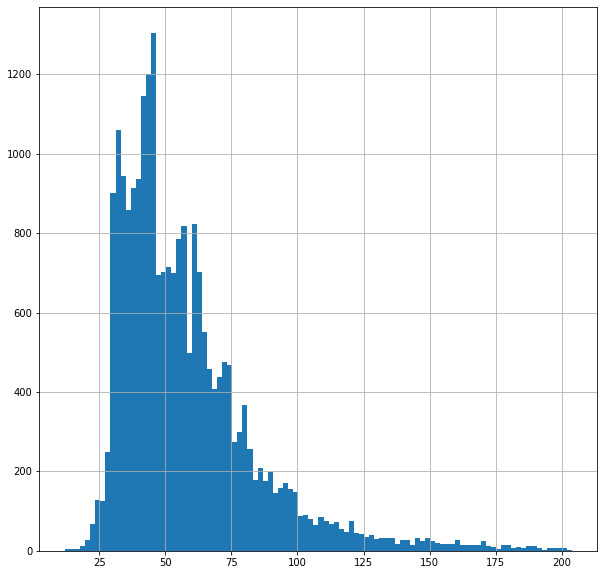

In [163]:
hist_plotting(housing, 'total_area')

#### График цены.

__________________________________________________
count       23691.00
mean      6542277.91
std      10888742.06
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64
__________________________________________________
Для исследования используются значения last_price в пределах от 12190.0 до 37400000.0
Из рассмотрения исключены выбивающиеся значения last_price, в количестве:
Cлева - 0
Справа - 220
Рекомендуется исключить из анализа не более 5%, тоесть 1185.0 значений, а лучше 1%, тоесть 237.0 значений


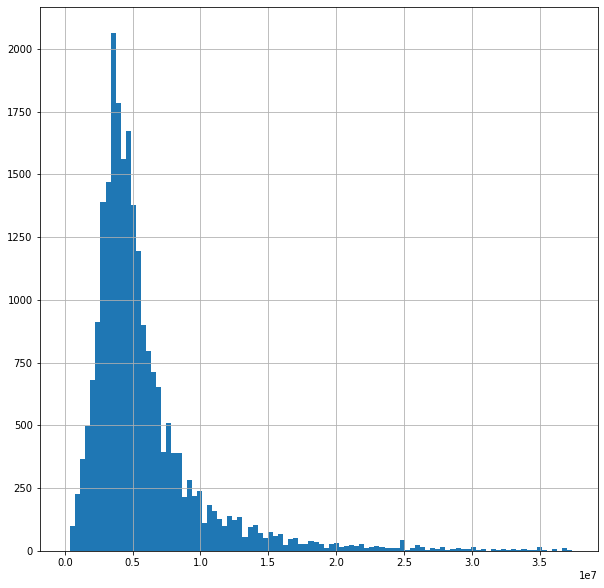

In [164]:
hist_plotting(housing, 'last_price')

#### График количества комнат.

__________________________________________________
count   23691.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64
__________________________________________________
Для исследования используются значения rooms в пределах от 0.0 до 6.0
Из рассмотрения исключены выбивающиеся значения rooms, в количестве:
Cлева - 0
Справа - 90
Рекомендуется исключить из анализа не более 5%, тоесть 1185.0 значений, а лучше 1%, тоесть 237.0 значений


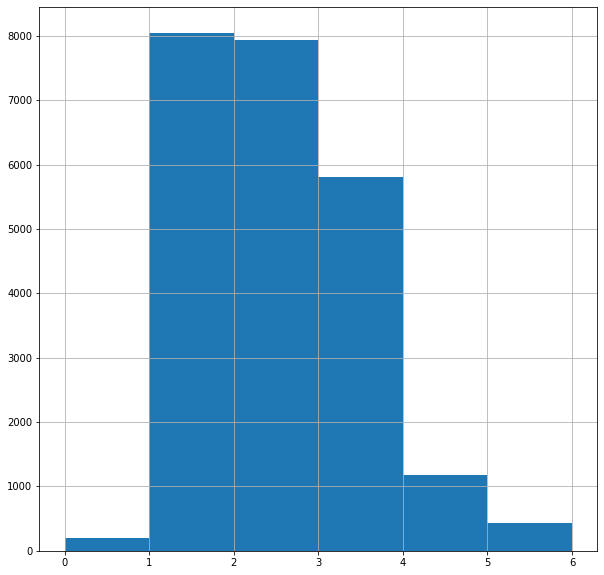

In [165]:
hist_plotting(housing, 'rooms')

#### График высоты потолков.

__________________________________________________
count   23691.00
mean        2.73
std         0.99
min         1.00
25%         2.55
50%         2.65
75%         2.75
max       100.00
Name: ceiling_height, dtype: float64
__________________________________________________
Для исследования используются значения ceiling_height в пределах от 2.3 до 3.6
Из рассмотрения исключены выбивающиеся значения ceiling_height, в количестве:
Cлева - 16
Справа - 222
Рекомендуется исключить из анализа не более 5%, тоесть 1185.0 значений, а лучше 1%, тоесть 237.0 значений


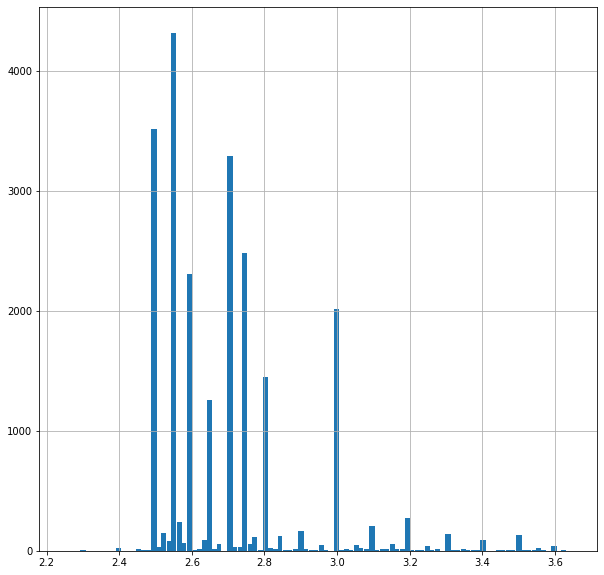

In [166]:
hist_plotting(housing, 'ceiling_height')

График высоты потолков показывает пики значений стандартных значений высот потолков. Для приведения к пикам остальных значений округлим значения в датасете до первого знака

In [167]:
housing['ceiling_height'] = housing['ceiling_height'].round(1)

__________________________________________________
count   23691.00
mean        2.75
std         0.99
min         1.00
25%         2.60
50%         2.60
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64
__________________________________________________
Для исследования используются значения ceiling_height в пределах от 2.3 до 3.6
Из рассмотрения исключены выбивающиеся значения ceiling_height, в количестве:
Cлева - 16
Справа - 218
Рекомендуется исключить из анализа не более 5%, тоесть 1185.0 значений, а лучше 1%, тоесть 237.0 значений


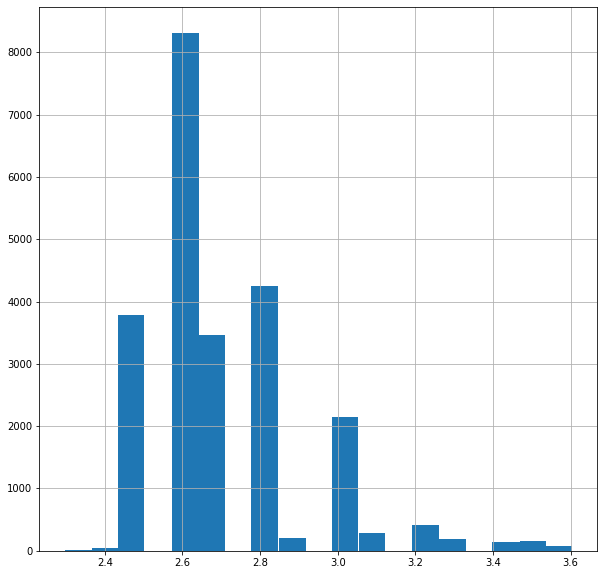

In [168]:
hist_plotting(housing, 'ceiling_height')

#### График длительности размещения объявления.

__________________________________________________
count   20511.00
mean      180.91
std       219.76
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64
__________________________________________________
Для исследования используются значения days_exposition в пределах от 1.0 до 1073.5
Из рассмотрения исключены выбивающиеся значения days_exposition, в количестве:
Cлева - 0
Справа - 201
Рекомендуется исключить из анализа не более 5%, тоесть 1026.0 значений, а лучше 1%, тоесть 205.0 значений


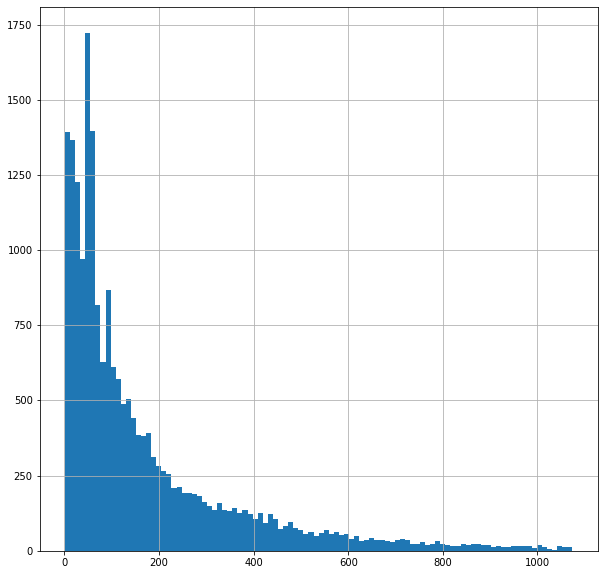

In [169]:
hist_plotting(housing, 'days_exposition')

#### Уберем очень большие и выделяющиеся значения из вышеуказанных столбцов, ориентируясь на значения полученные в прошлой операции.

In [170]:
housing = housing.drop(housing[housing.total_area > 203.9].index)
housing = housing.drop(housing[housing.total_area < 12].index)
housing = housing.drop(housing[housing.last_price > 37400000].index)
housing = housing.drop(housing[housing.last_price < 12190].index)
housing = housing.drop(housing[housing.rooms > 6].index)
housing = housing.drop(housing[housing.ceiling_height < 2.3].index)
housing = housing.drop(housing[housing.ceiling_height > 3.6].index)
housing = housing.drop(housing[housing.days_exposition > 1073.5].index)
housing = housing.drop(housing[housing.days_exposition < 14].index)

In [171]:
housing.reset_index(drop = True, inplace = True)
len(housing)

21344

Мы потеряли около 3% датасета

В столбце количества комнат нулевые значения для квартир со свободной планировкой и квартир-студий. Заменим это значение на 1.

In [172]:
housing['rooms'] = housing['rooms'].replace(0 , 1)

### Вывод
1. Распределения имеют вид распределения Пуансона.
2. Сразу исключены слишком большые выделяющиеся значения.
3. Длительность размещения объявления имеет неестественно низкие значения и неестественно высокие. Значения от одного дня до недели - невероятно низкие, объявления размещенные более одного года неестественно высокие. Вероятно первые связаны с тем что люди размещли объявления с неверными данными и быстро снимали их, заметив ошибку. Вторые скорее связаны с тем что после совершения сделки объявление не снимали. Стоит ли избавляться от таких значений или менять их на среднее или медиану?
4. В среднем время продажи занимает 180 дней, и медиана 95.

# Рассмотрим что влияет на стоимость квартиры

In [200]:
#Исключим из рассмотрения слабо влияющие значения.
housing.drop(
    ['total_images', 
     'is_apartment', 
     'studio', 
     'open_plan', 
     'day_of_week_exposition', 
     'balcony', 
     'kitchen_area', 
     'living_area', 
     'last_day_exposition'],
    axis='columns').corr()

,last_price,total_area,rooms,ceiling_height,floors_total,floor,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,...,ponds_nearest,days_exposition,ponds_nrearest,parks_nrearest,price_per_meter,month_of_exposition,year_of_exposition,living_area_percent,kitchen_area_percent,cityCenters_km
last_price,1.00,0.78,0.48,0.42,0.09,0.09,-0.07,-0.34,0.28,0.03,...,-0.11,0.10,-0.11,0.03,0.70,0.00,-0.02,0.00,-0.09,-0.34
total_area,0.78,1.00,0.79,0.37,-0.04,-0.02,-0.05,-0.24,0.17,0.01,...,-0.08,0.13,-0.08,0.01,0.18,0.01,-0.06,0.17,-0.33,-0.24
rooms,0.48,0.79,1.00,0.17,-0.21,-0.15,-0.09,-0.19,0.12,-0.04,...,-0.04,0.10,-0.04,-0.04,-0.05,0.00,-0.04,0.52,-0.58,-0.19
ceiling_height,0.42,0.37,0.17,1.00,0.01,0.01,-0.08,-0.22,0.21,-0.06,...,-0.12,0.09,-0.12,-0.06,0.30,-0.01,-0.05,-0.06,0.05,-0.22
floors_total,0.09,-0.04,-0.21,0.01,1.00,0.68,0.16,0.12,-0.14,0.10,...,0.04,-0.05,0.04,0.10,0.25,0.01,0.00,-0.35,0.33,0.12
floor,0.09,-0.02,-0.15,0.01,0.68,1.00,0.11,0.09,-0.10,0.07,...,0.03,-0.04,0.03,0.07,0.20,0.02,0.00,-0.26,0.23,0.09
airports_nearest,-0.07,-0.05,-0.09,-0.08,0.16,0.11,1.00,0.40,-0.04,-0.08,...,0.01,-0.03,0.01,-0.08,-0.08,0.01,0.02,-0.10,0.08,0.40
cityCenters_nearest,-0.34,-0.24,-0.19,-0.22,0.12,0.09,0.40,1.00,-0.20,-0.05,...,0.01,-0.06,0.01,-0.05,-0.37,0.00,0.03,-0.07,0.09,1.00
parks_around3000,0.28,0.17,0.12,0.21,-0.14,-0.10,-0.04,-0.20,1.00,-0.25,...,-0.16,0.04,-0.16,-0.25,0.30,-0.01,-0.04,0.07,-0.07,-0.20
parks_nearest,0.03,0.01,-0.04,-0.06,0.10,0.07,-0.08,-0.05,-0.25,1.00,...,0.01,0.02,0.01,1.00,0.05,0.01,-0.02,-0.09,0.06,-0.05


In [174]:
#Составим графики по заданным в задании значениям
housing_cost = housing.loc[:,['last_price', 'total_area','cityCenters_nearest', 'days_exposition', 'year_of_exposition']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C991F9CC08>,
      dtype=object)

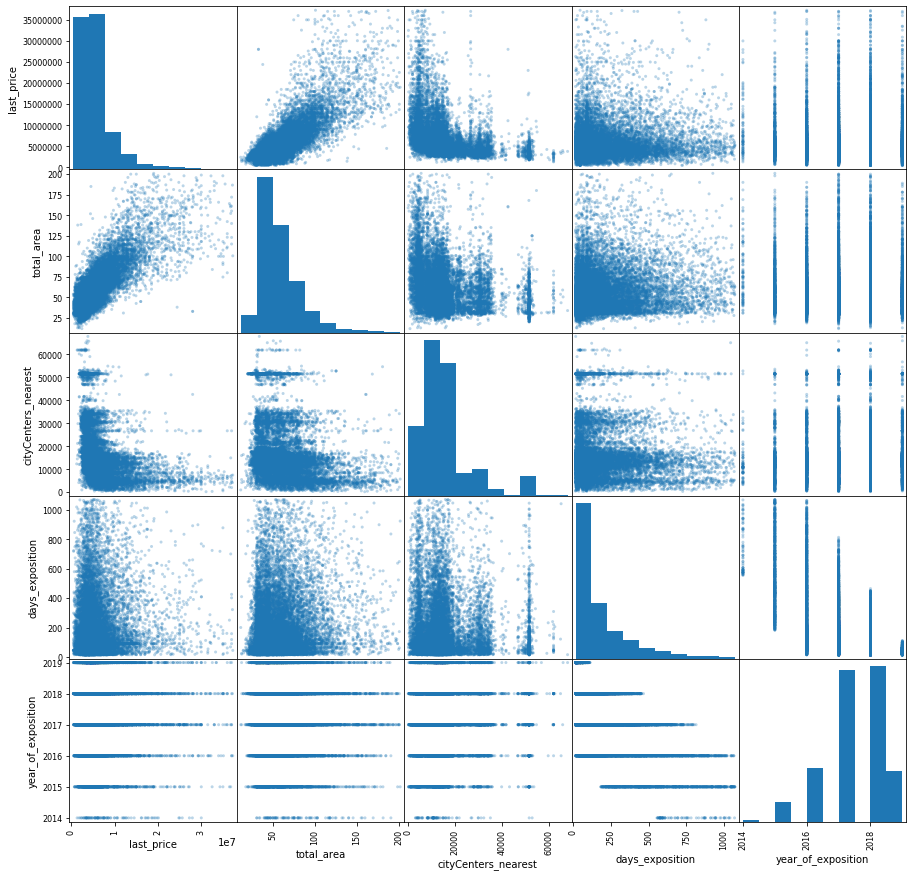

In [175]:
pd.plotting.scatter_matrix(housing_cost, figsize =(15,15), alpha = 0.3)

## Выводы
1. Цена квартиры в первую очередь зависит от ее площади.
2. Также с увеличением количества комнат цена тоже возрастает. При этом надо понимать что с увеличением числа комнат увеличивается и площадь.
3. С увеличением дальности квартиры от центра города цена падает, зависимость обратная. Причем и в центре и на окраине имеются квартиры с низкой стоимостью, но вот квартиры с высокой стоимостью встречаются чаще в центре.
4. На цену также влияет высота потолка.
5. Слабая положительная зависимость имеется и от близости к паркам и прудам.

In [176]:
def category_hist(df, column, value, b=100, k='hist', plot_hist=False, plot_hist_mean=True, print_pivot = True):
    """
    Функция строит графики данных в задаче значений (медианы и среднего) от стоимости.
    Также выводит значения отношения медианы и среднего к минимальной медиане и среднему (это позволяет оценить
    рост или падение значения)
    """
    column_group = df.groupby(column)
    if plot_hist:
        for name, group_data in column_group:
            group_data.plot(y=value, kind=k, title=name, bins=100, figsize =(10,4), grid=True)
        
    pivot_t = df.pivot_table(index = column, values=value, aggfunc=['mean','median'])
    pivot_t.columns = ['mean', 'median']
    if plot_hist_mean:
        pivot_t.plot(grid=True, figsize=(10,5))
    pivot_t['mean_to_min'] = pivot_t['mean'] / pivot_t['mean'].min()
    pivot_t['median_to_min'] = pivot_t['median'] / pivot_t['median'].min()
    if print_pivot:
        print(pivot_t)   

#### График зависимости цены квартиры от количества комнат

             mean    median  mean_to_min  median_to_min
rooms                                                  
1      3784108.35   3570000         1.00           1.00
2      5454595.08   4750000         1.44           1.33
3      7547811.31   6150000         1.99           1.72
4     10478582.31   8650000         2.77           2.42
5     13510598.10  12500000         3.57           3.50
6     15335505.26  13500000         4.05           3.78


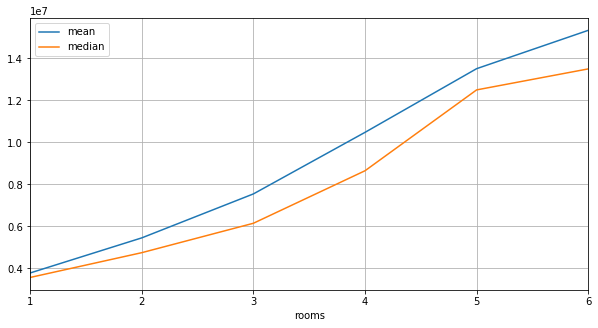

In [177]:
category_hist(housing, 'rooms', 'last_price')

#### График зависимости цены квартиры от этажа квартиры

                  mean   median  mean_to_min  median_to_min
floor_group                                                
another     6025917.32  4800000         1.35           1.23
first       4470880.50  3899000         1.00           1.00
last        5452740.66  4250000         1.22           1.09


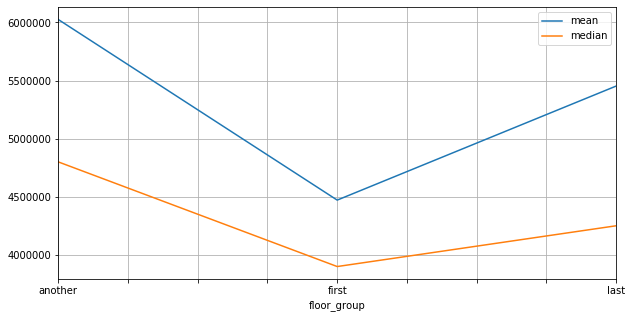

In [178]:
category_hist(housing, 'floor_group', 'last_price')

#### График зависимости цены квартиры от дня появления объявления

                             mean   median  mean_to_min  median_to_min
day_of_week_exposition                                                
0                      5757430.56  4600000         1.05           1.02
1                      5766304.99  4700000         1.05           1.04
2                      5873713.52  4650000         1.07           1.03
3                      5825355.20  4600000         1.06           1.02
4                      5677724.58  4550000         1.03           1.01
5                      5490412.46  4500000         1.00           1.00
6                      5654159.40  4500000         1.03           1.00


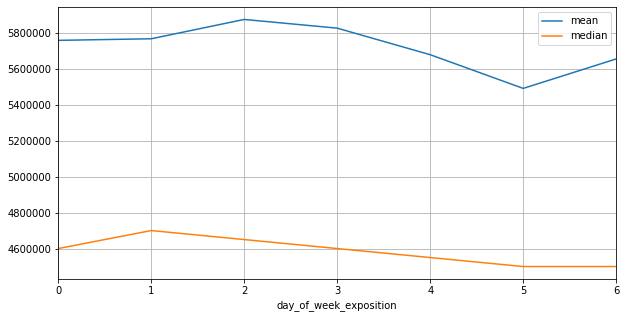

In [179]:
category_hist(housing, 'day_of_week_exposition', 'last_price')

#### График зависимости цены квартиры от месяца

                          mean   median  mean_to_min  median_to_min
month_of_exposition                                                
1                   5814499.24  4600000         1.05           1.05
2                   5754122.96  4600000         1.04           1.05
3                   5709950.45  4637500         1.04           1.05
4                   5744804.36  4750000         1.04           1.08
5                   5757719.45  4500000         1.04           1.02
6                   5514401.68  4400000         1.00           1.00
7                   5754995.54  4600000         1.04           1.05
8                   5790350.58  4520000         1.05           1.03
9                   5857056.57  4650000         1.06           1.06
10                  5712990.53  4550000         1.04           1.03
11                  5881704.85  4680000         1.07           1.06
12                  5664197.07  4600000         1.03           1.05


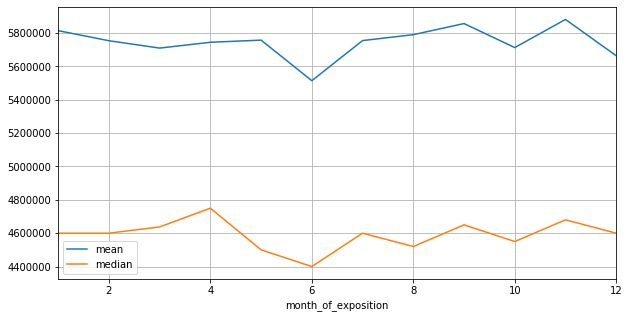

In [180]:
category_hist(housing, 'month_of_exposition', 'last_price')

#### График зависимости цены квартиры от года

                         mean   median  mean_to_min  median_to_min
year_of_exposition                                                
2014               9383262.00  7265000         1.67           1.63
2015               6427663.90  5050000         1.15           1.13
2016               5713001.30  4450000         1.02           1.00
2017               5646771.65  4500000         1.01           1.01
2018               5606351.69  4550000         1.00           1.02
2019               6112372.03  5050000         1.09           1.13


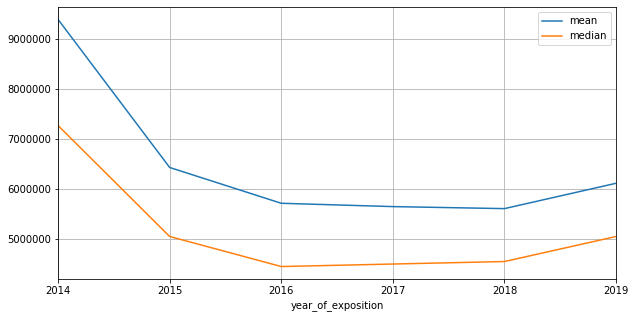

In [181]:
category_hist(housing, 'year_of_exposition', 'last_price')

### Выводы
1. График показывает что увеличение числа комнат ведет к увеличению стоимости
2. Цены квартир на первом и последнем этажах ниже чем на остальных
3. Цены квартир не зависят от дня недели и месяца размещения объявления
4. Цена квартиры зависит от года размещения - это связано с изменением на рынке.

# Исследуем 10 самых популярных населенных пуктов

In [182]:
#Сгруппируем датасет по названию населенных пуктов и выведем значения средней цены квартиры
location_groupby = housing.groupby('locality_name')
location_groupby_index=location_groupby.count().sort_values(by='last_price', ascending =False).head(10).index

In [183]:
for name in location_groupby_index:
    price_per_meter = location_groupby.get_group(name)['price_per_meter'].mean()
    print('Средняя цена квадратного населенном пункте {} равна {:.0f}'.format(name, price_per_meter))    

Средняя цена квадратного населенном пункте Санкт-Петербург равна 111266
Средняя цена квадратного населенном пункте Мурино равна 86195
Средняя цена квадратного населенном пункте Кудрово равна 95443
Средняя цена квадратного населенном пункте Шушары равна 78624
Средняя цена квадратного населенном пункте Всеволожск равна 68762
Средняя цена квадратного населенном пункте Пушкин равна 102481
Средняя цена квадратного населенном пункте Колпино равна 75079
Средняя цена квадратного населенном пункте Парголово равна 90107
Средняя цена квадратного населенном пункте Гатчина равна 68299
Средняя цена квадратного населенном пункте Выборг равна 58045


### Выводы
1. Дороже всего  квартиры стоят в Санкт-Петербурге, Пушкино и кудрово.
2. Самые дешевые города из топ.10 - Выборг, Всеволожск и Гатчина

# Найдем центр Санкт-петербурга

In [184]:
#Введем в датасет столбец с расстояниями до центра в километрах
housing['cityCenters_km'] = (housing['cityCenters_nearest'] / 1000).round(0)
spb_query = housing.query('locality_name == "Санкт-Петербург"')

In [185]:
spb_query.query('cityCenters_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nrearest,parks_nrearest,price_per_meter,day_of_week_exposition,month_of_exposition,year_of_exposition,floor_group,living_area_percent,kitchen_area_percent,cityCenters_km
75,9,10949000,68.00,2018-12-27,1,2.60,10,38.50,6,False,...,nan,nan,161014.70,3,12,2018,another,0.57,0.17,27.00
533,20,4200000,38.30,2019-04-16,1,2.60,16,19.80,10,False,...,nan,nan,109660.58,1,4,2019,another,0.52,0.26,27.00
544,11,9899000,101.00,2018-12-12,3,3.00,5,62.00,3,False,...,nan,nan,98009.90,2,12,2018,another,0.61,0.15,27.00
670,7,37000000,161.00,2016-05-22,3,2.60,9,84.00,8,False,...,nan,nan,229813.67,6,5,2016,another,0.52,0.17,27.00
676,13,14350000,74.00,2017-11-28,2,3.10,5,30.00,3,False,...,nan,1496.00,193918.92,1,11,2017,another,0.41,0.34,27.00
716,19,7100000,59.60,2019-02-13,2,3.40,5,36.59,2,False,...,nan,nan,119127.52,2,2,2019,another,0.61,0.21,27.00
1206,12,18500000,66.00,2017-06-08,1,3.00,7,25.00,7,False,...,nan,nan,280303.03,3,6,2017,last,0.38,0.53,27.00
1699,12,9500000,130.00,2019-03-27,5,2.60,5,90.00,2,False,...,nan,nan,73076.92,2,3,2019,another,0.69,0.12,27.00
2117,17,4300000,32.60,2019-04-28,1,2.80,25,14.30,17,False,...,nan,nan,131901.84,6,4,2019,another,0.44,0.25,27.00
2433,14,5650000,51.00,2019-02-26,2,3.20,9,31.00,5,False,...,nan,nan,110784.31,1,2,2019,another,0.61,0.20,27.00


                      mean    median  mean_to_min  median_to_min
cityCenters_km                                                  
0.00           15532416.67  13500000         4.04           4.08
1.00           11862650.34  10000000         3.09           3.02
2.00           10942556.03   9200000         2.85           2.78
3.00            9888740.30   8300000         2.57           2.51
4.00           10558879.91   8750000         2.75           2.64
5.00           10799196.53   8970000         2.81           2.71
6.00           10111025.85   8163000         2.63           2.47
7.00           10449712.01   7300000         2.72           2.21
8.00            8951645.15   7450000         2.33           2.25
9.00            6931603.65   5400000         1.80           1.63
10.00           6429076.62   5000000         1.67           1.51
11.00           6195270.51   5100000         1.61           1.54
12.00           5830966.49   5000000         1.52           1.51
13.00           6095317.4

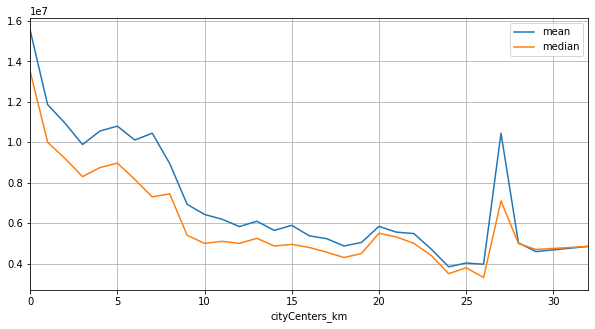

In [186]:
category_hist(spb_query, 'cityCenters_km', 'last_price')

### Вывод
Судя по изменению цены (резкое снижение на графике), центральный район города находится где-то в радиусе 
7-8 км.

# Изучим цены в центре и по всему городу

In [187]:
#Выделим значения в центре города
spb_center = housing.query('cityCenters_km <=8 and locality_name == "Санкт-Петербург"')

__________________________________________________
count   3447.00
mean      79.14
std       34.38
min       12.00
25%       53.00
50%       72.50
75%       97.80
max      201.00
Name: total_area, dtype: float64
__________________________________________________
Для исследования используются значения total_area в пределах от 12.0 до 187.4
Из рассмотрения исключены выбивающиеся значения total_area, в количестве:
Cлева - 0
Справа - 17
Рекомендуется исключить из анализа не более 5%, тоесть 172.0 значений, а лучше 1%, тоесть 34.0 значений
__________________________________________________
count   21344.00
mean       57.77
std        25.53
min        12.00
25%        40.00
50%        52.00
75%        68.40
max       201.00
Name: total_area, dtype: float64
__________________________________________________
Для исследования используются значения total_area в пределах от 12.0 до 167.8
Из рассмотрения исключены выбивающиеся значения total_area, в количестве:
Cлева - 0
Справа - 121
Рекомендуется

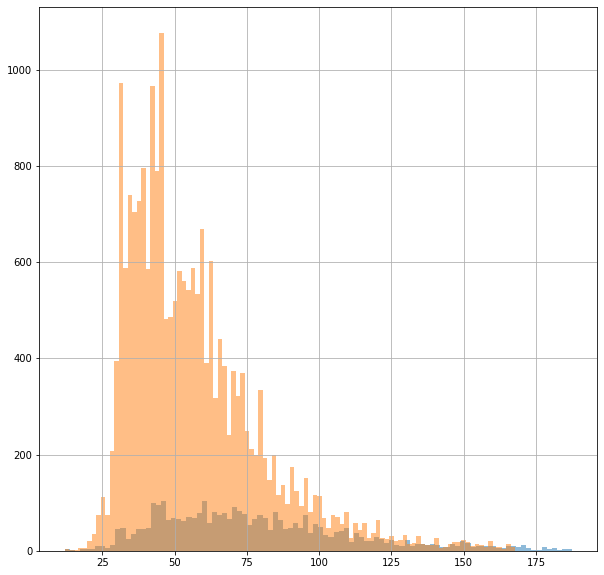

In [188]:
for df in (spb_center, housing):
    hist_plotting(df, 'total_area', a=0.5)

#### Средние значения площади квартир в центре города больше чем по остальной выборке

__________________________________________________
count       3447.00
mean    10319048.66
std      6133260.24
min      1686000.00
25%      6264500.00
50%      8500000.00
75%     12377000.00
max     37272000.00
Name: last_price, dtype: float64
__________________________________________________
Для исследования используются значения last_price в пределах от 1686000.0 до 33770750.0
Из рассмотрения исключены выбивающиеся значения last_price, в количестве:
Cлева - 0
Справа - 30
Рекомендуется исключить из анализа не более 5%, тоесть 172.0 значений, а лучше 1%, тоесть 34.0 значений
__________________________________________________
count      21344.00
mean     5747823.32
std      4181615.83
min       430000.00
25%      3400000.00
50%      4600000.00
75%      6607750.00
max     37272000.00
Name: last_price, dtype: float64
__________________________________________________
Для исследования используются значения last_price в пределах от 430000.0 до 24250375.0
Из рассмотрения исключены выбивающи

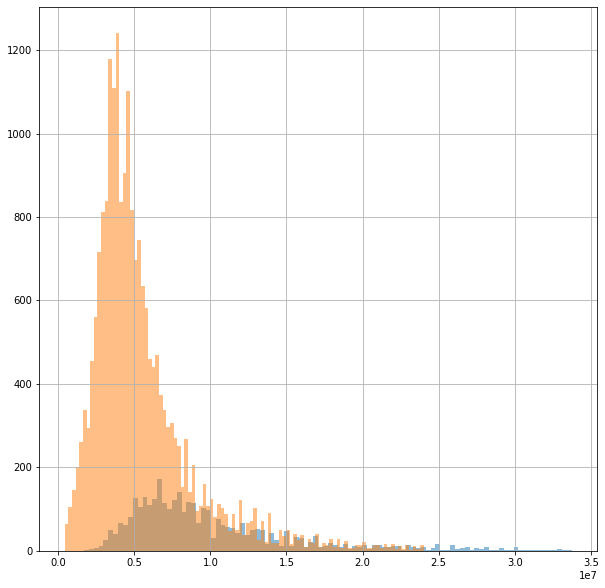

In [189]:
for df in (spb_center, housing):
    hist_plotting(df, 'last_price', a=0.5)


#### Цена квартиры тоже в среднем выше

__________________________________________________
count   3447.00
mean       2.58
std        1.12
min        1.00
25%        2.00
50%        3.00
75%        3.00
max        6.00
Name: rooms, dtype: float64
__________________________________________________
Для исследования используются значения rooms в пределах от 1.0 до 6.0
Из рассмотрения исключены выбивающиеся значения rooms, в количестве:
Cлева - 0
Справа - 0
Рекомендуется исключить из анализа не более 5%, тоесть 172.0 значений, а лучше 1%, тоесть 34.0 значений
__________________________________________________
count   21344.00
mean        2.04
std         0.96
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: float64
__________________________________________________
Для исследования используются значения rooms в пределах от 1.0 до 6.0
Из рассмотрения исключены выбивающиеся значения rooms, в количестве:
Cлева - 0
Справа - 0
Рекомендуется исключить из анализа не более 5%, тоес

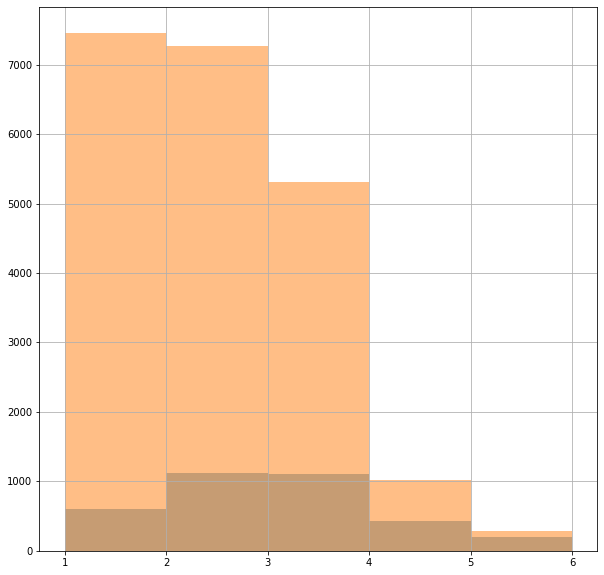

In [190]:
for df in (spb_center, housing):
    hist_plotting(df, 'rooms', a=0.5)

#### В центре гоорода продается больше двух и трехкомнатных квартир

__________________________________________________
count   3447.00
mean       2.91
std        0.27
min        2.40
25%        2.70
50%        2.90
75%        3.00
max        3.60
Name: ceiling_height, dtype: float64
__________________________________________________
Для исследования используются значения ceiling_height в пределах от 2.4 до 3.6
Из рассмотрения исключены выбивающиеся значения ceiling_height, в количестве:
Cлева - 0
Справа - 0
Рекомендуется исключить из анализа не более 5%, тоесть 172.0 значений, а лучше 1%, тоесть 34.0 значений
__________________________________________________
count   21344.00
mean        2.71
std         0.19
min         2.30
25%         2.60
50%         2.60
75%         2.80
max         3.60
Name: ceiling_height, dtype: float64
__________________________________________________
Для исследования используются значения ceiling_height в пределах от 2.3 до 3.4
Из рассмотрения исключены выбивающиеся значения ceiling_height, в количестве:
Cлева - 0
Справа - 

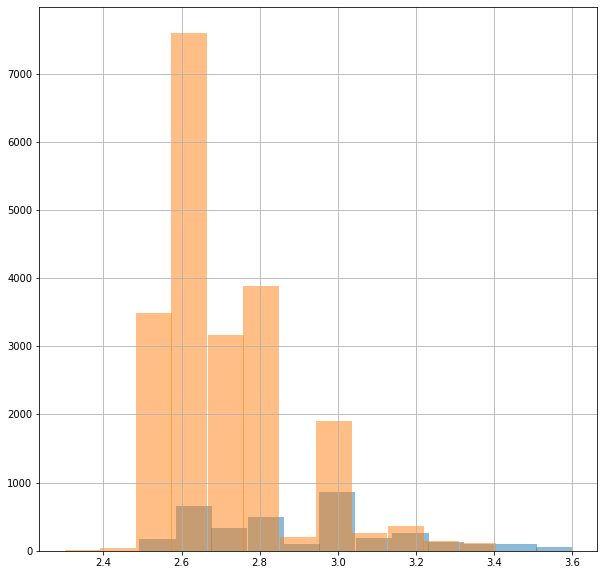

In [191]:
for df in (spb_center, housing):
    hist_plotting(df, 'ceiling_height', a=0.5)

#### Потолки в центре в среднем выше чем на окраине

__________________________________________________
count   2889.00
mean     228.04
std      226.36
min       14.00
25%       61.00
50%      143.00
75%      323.00
max     1069.00
Name: days_exposition, dtype: float64
__________________________________________________
Для исследования используются значения days_exposition в пределах от 14.0 до 978.0
Из рассмотрения исключены выбивающиеся значения days_exposition, в количестве:
Cлева - 0
Справа - 23
Рекомендуется исключить из анализа не более 5%, тоесть 144.0 значений, а лучше 1%, тоесть 29.0 значений
__________________________________________________
count   18297.00
mean      183.18
std       195.16
min        14.00
25%        49.00
50%       107.00
75%       240.00
max      1072.00
Name: days_exposition, dtype: float64
__________________________________________________
Для исследования используются значения days_exposition в пределах от 14.0 до 1004.0
Из рассмотрения исключены выбивающиеся значения days_exposition, в количестве:
Cлева

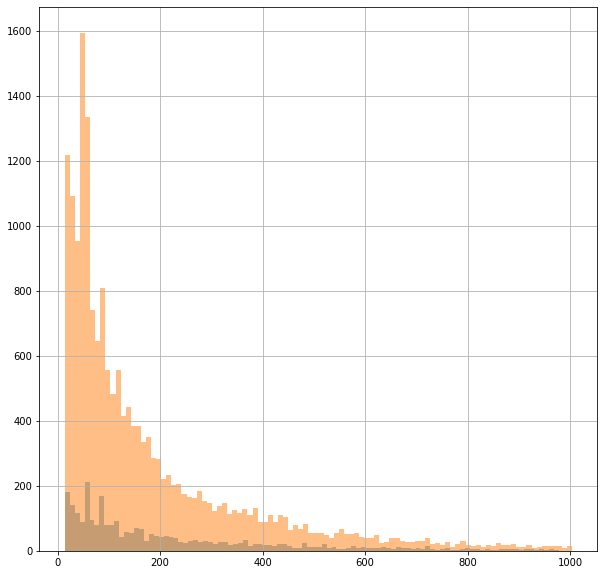

In [192]:
for df in (spb_center, housing):
    hist_plotting(df, 'days_exposition', a=0.5)

#### А вот продаются квартиры в центре дольше

In [193]:
spb_center.drop(
    ['total_images', 
     'is_apartment', 
     'studio', 
     'open_plan', 
     'day_of_week_exposition', 
     'balcony', 
     'kitchen_area', 
     'living_area', 
     'last_day_exposition'], 
    axis='columns').corr()

,last_price,total_area,rooms,ceiling_height,floors_total,floor,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,...,ponds_nearest,days_exposition,ponds_nrearest,parks_nrearest,price_per_meter,month_of_exposition,year_of_exposition,living_area_percent,kitchen_area_percent,cityCenters_km
last_price,1.00,0.73,0.43,0.20,0.14,0.18,0.09,-0.09,0.11,-0.00,...,-0.07,0.10,-0.07,-0.00,0.62,-0.01,0.01,-0.02,-0.08,-0.09
total_area,0.73,1.00,0.79,0.28,0.01,0.08,0.00,-0.18,0.08,-0.01,...,-0.05,0.15,-0.05,-0.01,-0.01,-0.00,-0.07,0.18,-0.32,-0.18
rooms,0.43,0.79,1.00,0.26,-0.19,-0.08,-0.07,-0.23,0.08,-0.08,...,-0.04,0.12,-0.04,-0.08,-0.22,-0.01,-0.05,0.47,-0.50,-0.23
ceiling_height,0.20,0.28,0.26,1.00,-0.27,-0.18,-0.07,-0.29,0.13,-0.12,...,-0.07,0.10,-0.07,-0.12,0.03,-0.03,0.03,0.13,-0.10,-0.28
floors_total,0.14,0.01,-0.19,-0.27,1.00,0.68,0.23,0.44,-0.23,0.16,...,0.03,-0.02,0.03,0.16,0.19,0.02,-0.03,-0.34,0.19,0.43
floor,0.18,0.08,-0.08,-0.18,0.68,1.00,0.12,0.29,-0.16,0.12,...,0.02,-0.02,0.02,0.12,0.16,0.01,-0.02,-0.21,0.09,0.28
airports_nearest,0.09,0.00,-0.07,-0.07,0.23,0.12,1.00,0.36,0.01,-0.02,...,0.01,-0.02,0.01,-0.02,0.11,-0.04,0.04,-0.10,0.06,0.34
cityCenters_nearest,-0.09,-0.18,-0.23,-0.29,0.44,0.29,0.36,1.00,-0.21,0.08,...,0.20,-0.09,0.20,0.08,0.00,-0.00,0.05,-0.13,0.07,0.99
parks_around3000,0.11,0.08,0.08,0.13,-0.23,-0.16,0.01,-0.21,1.00,-0.27,...,-0.14,0.03,-0.14,-0.27,0.09,-0.03,-0.00,0.08,-0.03,-0.22
parks_nearest,-0.00,-0.01,-0.08,-0.12,0.16,0.12,-0.02,0.08,-0.27,1.00,...,0.11,0.02,0.11,1.00,0.01,0.06,-0.04,-0.13,0.08,0.07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9928415C8>,
      dtype=object)

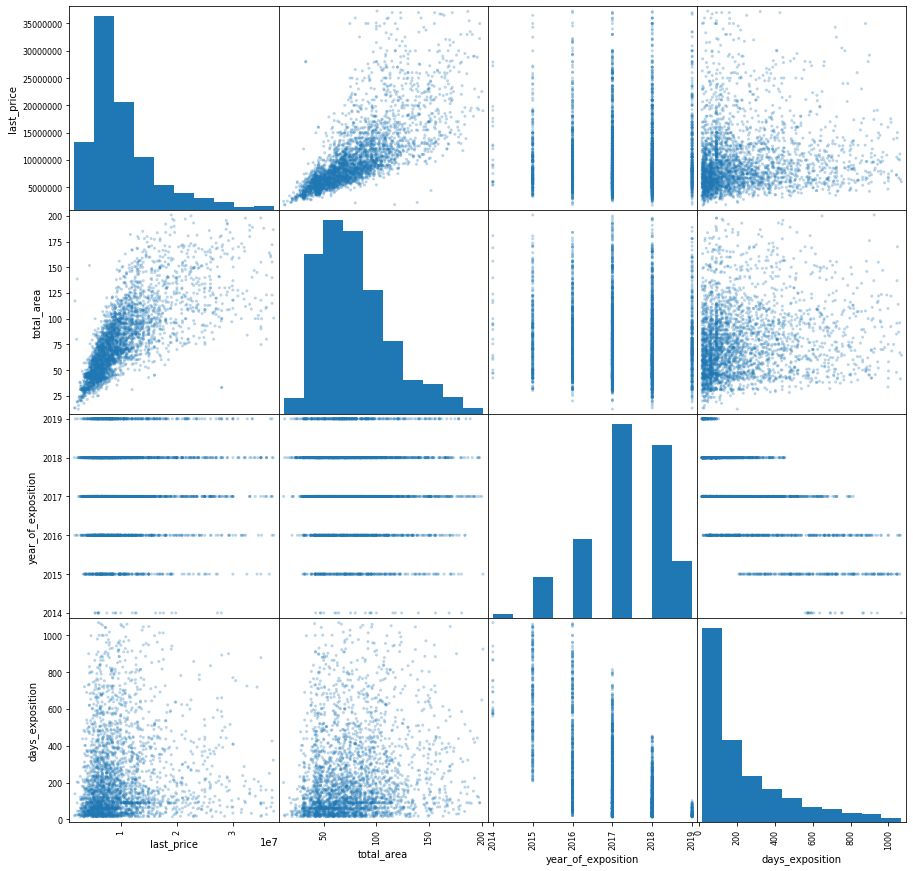

In [194]:
spb_center_cost = spb_center.loc[:,['last_price', 'total_area','year_of_exposition', 'days_exposition']]
pd.plotting.scatter_matrix(spb_center_cost, figsize =(15,15), alpha = 0.3)

#### График зависимости цены квартиры от количества комнат

             mean    median  mean_to_min  median_to_min
rooms                                                  
1      6271067.50   5800000         1.00           1.00
2      8810945.08   7600000         1.41           1.31
3     11827369.90   9600000         1.89           1.66
4     13709614.63  11564288         2.19           1.99
5     15080368.61  13000000         2.40           2.24
6     15963181.82  13475000         2.55           2.32
             mean    median  mean_to_min  median_to_min
rooms                                                  
1      3784108.35   3570000         1.00           1.00
2      5454595.08   4750000         1.44           1.33
3      7547811.31   6150000         1.99           1.72
4     10478582.31   8650000         2.77           2.42
5     13510598.10  12500000         3.57           3.50
6     15335505.26  13500000         4.05           3.78


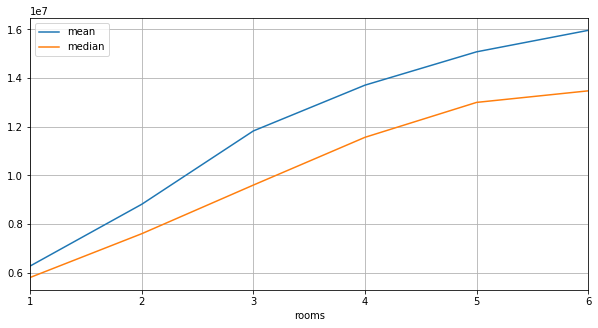

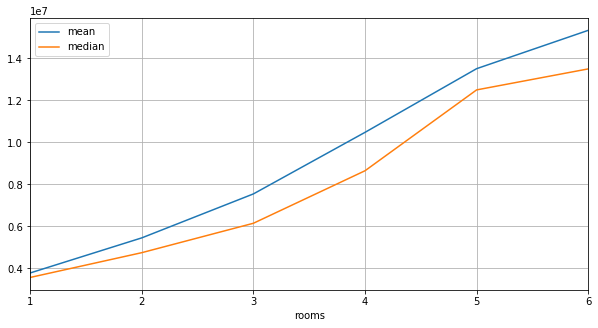

In [195]:
for df in (spb_center, housing):
    category_hist(df, 'rooms', 'last_price')

Динамика роста стоимости квартиры от количества комнат, в общем такая же, только несколько сильнее вырастают в цене трехкомнатыне квартиры

#### График зависимости цены квартиры от этажа квартиры

                   mean   median  mean_to_min  median_to_min
floor_group                                                 
another     10770520.79  8900000         1.43           1.41
first        7510588.95  6312500         1.00           1.00
last        10233641.40  8500000         1.36           1.35
                  mean   median  mean_to_min  median_to_min
floor_group                                                
another     6025917.32  4800000         1.35           1.23
first       4470880.50  3899000         1.00           1.00
last        5452740.66  4250000         1.22           1.09


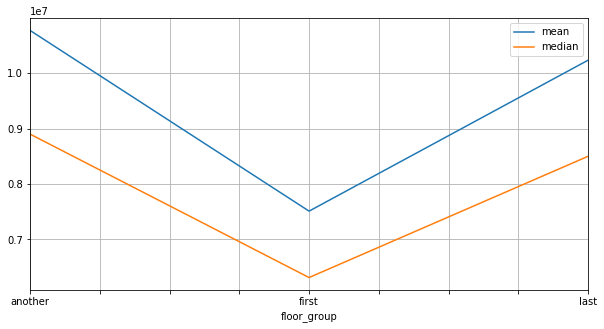

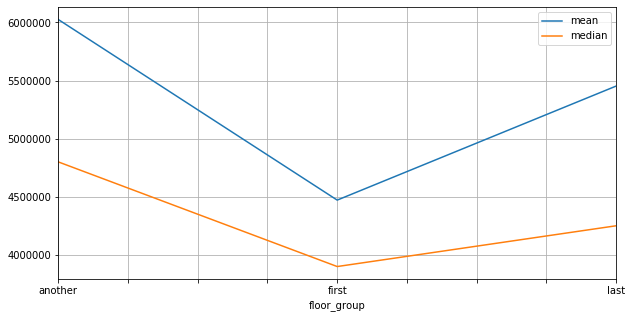

In [196]:
for df in (spb_center, housing):
    category_hist(df, 'floor_group', 'last_price')

Стоимость квартир на верхних этажах домов в центре уже не так сильно отличается от остальных квартир. Похоже что это связано с тем что из верхних этажей открывается лучший вид на город.

#### График зависимости цены квартиры от дня недели

                              mean   median  mean_to_min  median_to_min
day_of_week_exposition                                                 
0                      10568551.35  8700000         1.11           1.10
1                      10101982.88  8389000         1.06           1.07
2                      10621042.36  8552500         1.12           1.09
3                      10295814.80  8494500         1.08           1.08
4                      10135698.31  8500000         1.07           1.08
5                       9507661.57  7875000         1.00           1.00
6                      11032470.58  8750000         1.16           1.11
                             mean   median  mean_to_min  median_to_min
day_of_week_exposition                                                
0                      5757430.56  4600000         1.05           1.02
1                      5766304.99  4700000         1.05           1.04
2                      5873713.52  4650000         1.07           1.

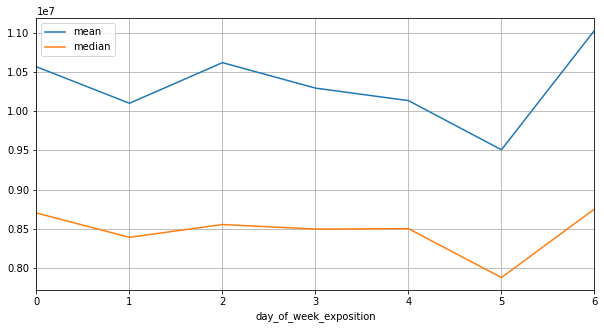

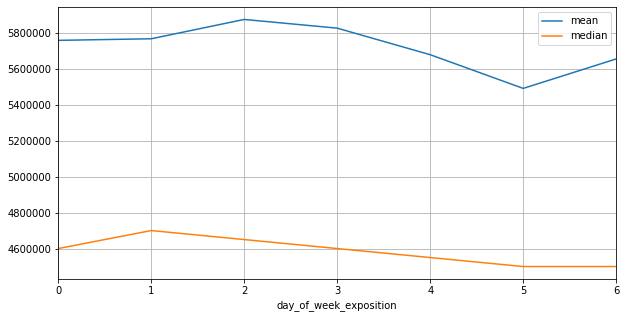

In [197]:
for df in (spb_center, housing):
    category_hist(df, 'day_of_week_exposition', 'last_price')

Интересно что размещенные в субботу квартиры дешевле размещенных в воскресенье.

#### График зависимости цены квартиры от месяца

                           mean   median  mean_to_min  median_to_min
month_of_exposition                                                 
1                   10366439.56  8400000         1.12           1.14
2                   10495714.22  8500000         1.13           1.16
3                   10490704.60  8750000         1.13           1.19
4                   10022725.69  8400000         1.08           1.14
5                   10424237.92  8500000         1.12           1.16
6                   10285887.89  8299500         1.11           1.13
7                   10389884.54  8900000         1.12           1.21
8                   10769538.38  8600000         1.16           1.17
9                   10129025.73  8990000         1.09           1.22
10                  10049185.27  8348412         1.08           1.14
11                  10849319.08  8806000         1.17           1.20
12                   9282656.78  7340000         1.00           1.00
                          mean   m

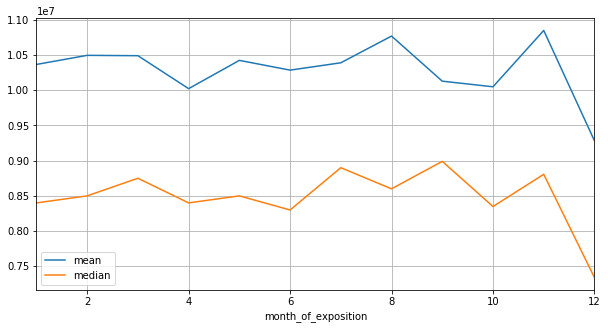

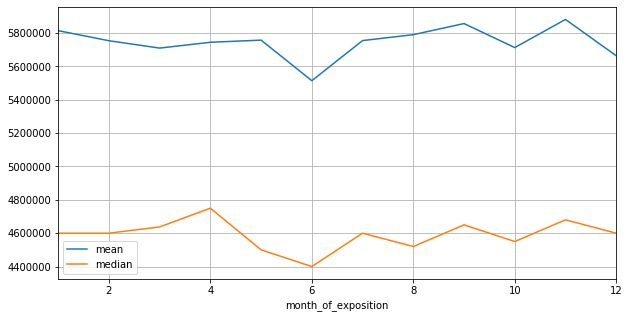

In [198]:
for df in (spb_center, housing):
    category_hist(df, 'month_of_exposition', 'last_price')

Цены на квартиры в центре в декабре несколько ниже чем в оставшиеся месяцы года.

#### График зависимости цены квартиры от года

                          mean   median  mean_to_min  median_to_min
year_of_exposition                                                 
2014               12431677.43  9990000         1.22           1.19
2015               10299285.23  8500000         1.01           1.01
2016               10462188.92  8780000         1.03           1.05
2017               10149174.38  8400000         1.00           1.00
2018               10177471.50  8490000         1.00           1.01
2019               11022024.11  8725246         1.09           1.04
                         mean   median  mean_to_min  median_to_min
year_of_exposition                                                
2014               9383262.00  7265000         1.67           1.63
2015               6427663.90  5050000         1.15           1.13
2016               5713001.30  4450000         1.02           1.00
2017               5646771.65  4500000         1.01           1.01
2018               5606351.69  4550000         1.00   

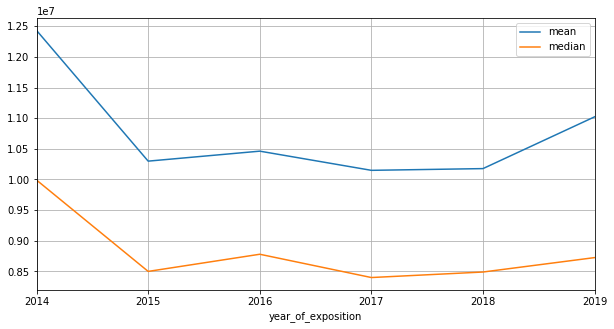

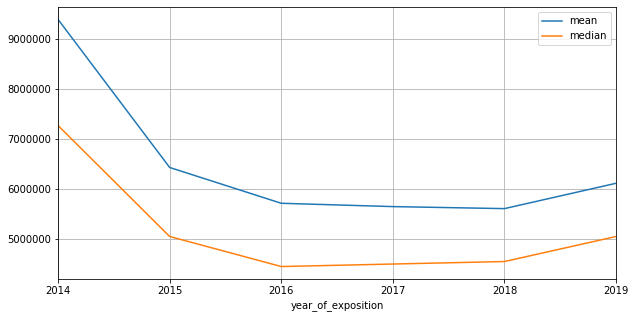

In [199]:
for df in (spb_center, housing):
    category_hist(df, 'year_of_exposition', 'last_price')

Тенденция к изменению стоимости квартир из года в год характерна как для центра города так и для окраин.

### Выводы 
Проведен исследовательский анализ данных датасета. 
Выявлены зависимости цены квартиры от следующих параметров:
- площади квартиры,
- удалению от центра,
- числа комнат в квартире,
- года размещения объявления,
- этажа.

Квартиры в центре Санкт-Петербурга больше, имеют больше комнат, потолки в квартирах выше, но и стоят они дороже.

### Шаг 5. Общий вывод

### Анализ данных показал параметры по которым можно оценить стоимость квартиры:
1. площадь квартиры - чем больше тем дороже квартира;
2. жилая площадь и площадь кухние - непосредственно зависят от площади квартиры;
3. удаление от центра - чем дальше тем меньше дорогих (элитных) квартир;
4. года размещения - надо учитывать ситуацию на рынке недвижимости по стране в целом;
5. этажа - первый этаж всегда стоит дешевле, последний на окраине тоже, а в центре так же как и на других этажах;

Также стоит отметить что из данных стоит исключать быстро снятые объявления, а также следить за тем чтобы исключать потерявшие актуальность объявления.

Также, для уменьшения пропущенных значений в данных, стоить увеличить количество обязательных позиций для заполнения пользователем.